<a href="https://colab.research.google.com/github/mrityunjay-singh-99/Deep_learning_CNN/blob/master/Rice_datasets_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset
License(s): CC0-1.0
 99% 218M/219M [00:06<00:00, 42.5MB/s]
100% 219M/219M [00:06<00:00, 36.3MB/s]


In [2]:
# /content/rice-image-dataset.zip

In [3]:
import zipfile

with zipfile.ZipFile('/content/rice-image-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/rice-image-dataset')

In [4]:
import os
base_path=os.listdir('/content/rice-image-dataset/Rice_Image_Dataset')
base_path

['Rice_Citation_Request.txt',
 'Basmati',
 'Arborio',
 'Ipsala',
 'Karacadag',
 'Jasmine']

In [5]:
base_path.remove('Rice_Citation_Request.txt')
base_path

['Basmati', 'Arborio', 'Ipsala', 'Karacadag', 'Jasmine']

15000
Basmati
/content/rice-image-dataset/Rice_Image_Dataset/Basmati


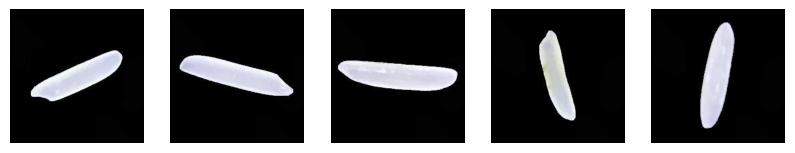

15000
Arborio
/content/rice-image-dataset/Rice_Image_Dataset/Arborio


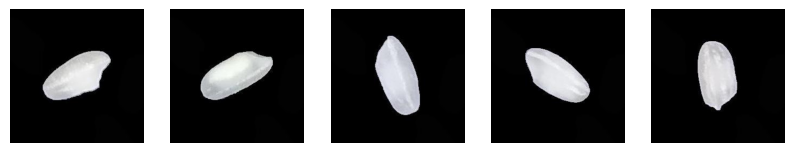

15000
Ipsala
/content/rice-image-dataset/Rice_Image_Dataset/Ipsala


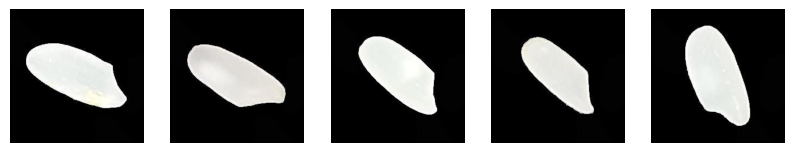

15000
Karacadag
/content/rice-image-dataset/Rice_Image_Dataset/Karacadag


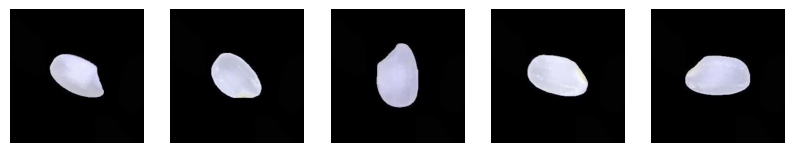

15000
Jasmine
/content/rice-image-dataset/Rice_Image_Dataset/Jasmine


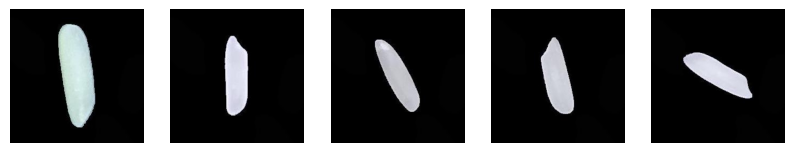

In [6]:
import os
from PIL import Image
import matplotlib.pyplot as plt

for i in base_path:
  class_path = os.path.join('/content/rice-image-dataset/Rice_Image_Dataset', i)
  image_list=os.listdir(class_path)
  print(len(image_list))
  print(i)
  print(class_path)

  fig,ax=plt.subplots(1,5,figsize=(10,10))
  for j in range(5):
      img_path = os.path.join(class_path, image_list[j])
      img = Image.open(img_path)
      ax[j].imshow(img)
      ax[j].axis('off')
  plt.show()

In [7]:
dataset_dir = '/content/rice-image-dataset/Rice_Image_Dataset'
os.listdir(dataset_dir)

['Rice_Citation_Request.txt',
 'Basmati',
 'Arborio',
 'Ipsala',
 'Karacadag',
 'Jasmine']

In [8]:
dataset_dir = '/content/rice-image-dataset/Rice_Image_Dataset'
class_names=os.listdir(dataset_dir)
class_names.remove('Rice_Citation_Request.txt')

class_names

['Basmati', 'Arborio', 'Ipsala', 'Karacadag', 'Jasmine']

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Create an ImageDataGenerator with augmentations

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

#set parameter  own argument
img_height, img_width = 250, 250
batch_size = 32

dataset_dir = '/content/rice-image-dataset/Rice_Image_Dataset'


#train dataset(60% of data)
Train = tf.keras.preprocessing.image_dataset_from_directory(
                                                  dataset_dir,
                                                  validation_split=0.4,
                                                  subset="training",
                                                  seed=123,
                                                  image_size=(img_height, img_width),
                                                  batch_size=batch_size,
                                                  labels="inferred",
                                                  label_mode="categorical"

                                                  )

# Validation dataset (20% of data)
Validation = tf.keras.preprocessing.image_dataset_from_directory(
                                                  dataset_dir,
                                                  validation_split=0.5,
                                                  subset="validation",
                                                  seed=123,                   # Keep the same seed
                                                  image_size=(img_height, img_width),
                                                  batch_size=batch_size,
                                                  labels="inferred",           # Automatically infer labels from subdirectory names
                                                  label_mode="categorical"     # Use 'categorical' to get one-hot encoded labels
                                                  )

# Test dataset (20% of data)
Test = tf.keras.preprocessing.image_dataset_from_directory(
                                                dataset_dir,
                                                validation_split=0.5,        # Split remaining 40% in half (20% each)
                                                subset="validation",
                                                seed=456,                    # Use a different seed to get a different split
                                                image_size=(img_height, img_width),
                                                batch_size=batch_size,
                                                labels="inferred",           # Automatically infer labels from subdirectory names
                                                label_mode="categorical"     # Use 'categorical' to get one-hot encoded labels
                                                )

Found 75000 files belonging to 5 classes.
Using 45000 files for training.
Found 75000 files belonging to 5 classes.
Using 37500 files for validation.
Found 75000 files belonging to 5 classes.
Using 37500 files for validation.


### Splite the datasets

In [10]:
# Retrieve the first batch from the train dataset
train_batch = next(iter(Train))

# Separate the images and labels from the batch
images_tr, labels_tr = train_batch

print("Train Images Shape:", images_tr.shape)
print("Train Labels Shape:", labels_tr.shape)


print(Train.class_names)

Train Images Shape: (32, 250, 250, 3)
Train Labels Shape: (32, 5)
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [11]:
# Retrieve the first batch from the Test dataset
test_batch = next(iter(Test))

# Separate the images and labels from the batch
images_te, labels_te = test_batch

print("Test Images Shape:", images_te.shape)
print("Test Labels Shape:", labels_te.shape)

print(Test.class_names)

Test Images Shape: (32, 250, 250, 3)
Test Labels Shape: (32, 5)
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [12]:
# Retrieve the first batch from the validaion dataset
valid_batch = next(iter(Validation))

# Separate the images and labels from the batch
images_v, labels_v = valid_batch

print("Validation Images shape:", images_v.shape)
print("Validation Labels shape:", labels_v.shape)


print(Validation.class_names)

Validation Images shape: (32, 250, 250, 3)
Validation Labels shape: (32, 5)
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


#### Checking our data is Scalled or not

In [13]:
#train data
image_batch_strain, labels_batch_strain = next(iter(Train)) # Get first batch
first_image_strain = image_batch_strain[0] # First Image, of first batch

#validation data
image_batch_sval, labels_batch_sval = next(iter(Validation))
first_image_sval = image_batch_sval[0]

#test data
image_batch_stest, labels_batch_stest = next(iter(Test))
first_image_stest = image_batch_stest[0]

#print values
import numpy as np
print("Train scale: ", np.min(first_image_strain), np.max(first_image_strain))
print("Validation scale: ", np.min(first_image_sval), np.max(first_image_sval))
print("Test scale: ", np.min(first_image_stest), np.max(first_image_stest))

Train scale:  0.0 255.0
Validation scale:  0.0 255.0
Test scale:  0.0 255.0


#### LearingRateLogger

- This code defines a custom callback called LearningRateLogger to track the learning rate after each epoch during model training.

In [14]:
class LearningRateLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = self.model.optimizer.lr.numpy()

# Instantiate the LearningRateLogger
lr_logger = LearningRateLogger()

#### callBacks

#### lr_logger = LearningRateLogger()
- This appears to be a custom callback (LearningRateLogger) that logs or monitors the learning rate during training. Since it's not part of the standard Keras library, it's likely defined elsewhere in the code.
- Purpose:
Tracks the changes in learning rate during training, which is helpful when you use dynamic learning rate adjustments (like ReduceLROnPlateau).

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
lr_logger = LearningRateLogger()
# Define callbacks
checkpointer = ModelCheckpoint(filepath='dataset_dir\\base_model.keras',  # Use .keras extension
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

# Combine callbacks
#callbacks = [checkpointer, early_stopping, reduce_lr]
callbacks = [ lr_logger, checkpointer, early_stopping, reduce_lr]

#### Define the CNN Model

In [16]:
# Define a basic CNN model
from tensorflow.keras import layers, models

def create_basic_cnn(input_shape, num_classes):

    model = models.Sequential()
    # First layer defines input shape
    model.add(layers.Input(shape=input_shape))

    # Remove input_shape from the first Conv2D layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))   # No need for input_shape here
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    #flatten shape take upcoming values
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


# Setup for model
#set the shape of image  and classes (equal to type of rice)
input_shape = (250, 250, 3)
num_classes = 5


# Set up the Mirrored Strategy
strategy = tf.distribute.MirroredStrategy()

# Create and compile the model within the strategy's scope
with strategy.scope():
    # Create and compile the model
    model = create_basic_cnn(input_shape, num_classes)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 248, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 107648)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      13,779,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,872,965 (52.92 MB)

 Trainable params: 13,872,965 (52.92 MB)

 Non-trainable params: 0 (0.00 B)

#### tf.distribute.MirroredStrategy():
- This strategy is used to distribute model training across multiple GPUs on a single machine.
- It works by mirroring the model on each GPU and ensuring that updates to the model are synchronized between GPUs.
- Data is automatically split among GPUs, and computations are run in parallel.

#### strategy.scope():
- This ensures that everything within this block is distributed correctly across the GPUs.
- Variables and computations created inside this block will be mirrored on all GPUs.
- Without the scope, TensorFlow wouldn’t apply the distribution strategy, and training would occur on a single device.

#### model = create_basic_cnn(input_shape, num_classes)
- This calls the create_basic_cnn function (assumed to be defined elsewhere) to build a Convolutional Neural Network (CNN).
- Parameters:
input_shape: Shape of the input data (e.g., (28, 28, 1) for grayscale images of size 28x28).
- num_classes: Number of output classes for classification.

#### model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
- Optimizer ('adam'):
Adaptive Moment Estimation (Adam) optimizer is used, which combines the advantages of RMSProp and Stochastic Gradient Descent (SGD).
- Loss Function ('categorical_crossentropy'):
Suitable for multi-class classification problems where the labels are one-hot encoded.
Measures the difference between the predicted probability distribution and the true distribution.
- Metrics (['accuracy']):
Tracks the model's accuracy during training and evaluation.

#### Visualization the Model Architecture

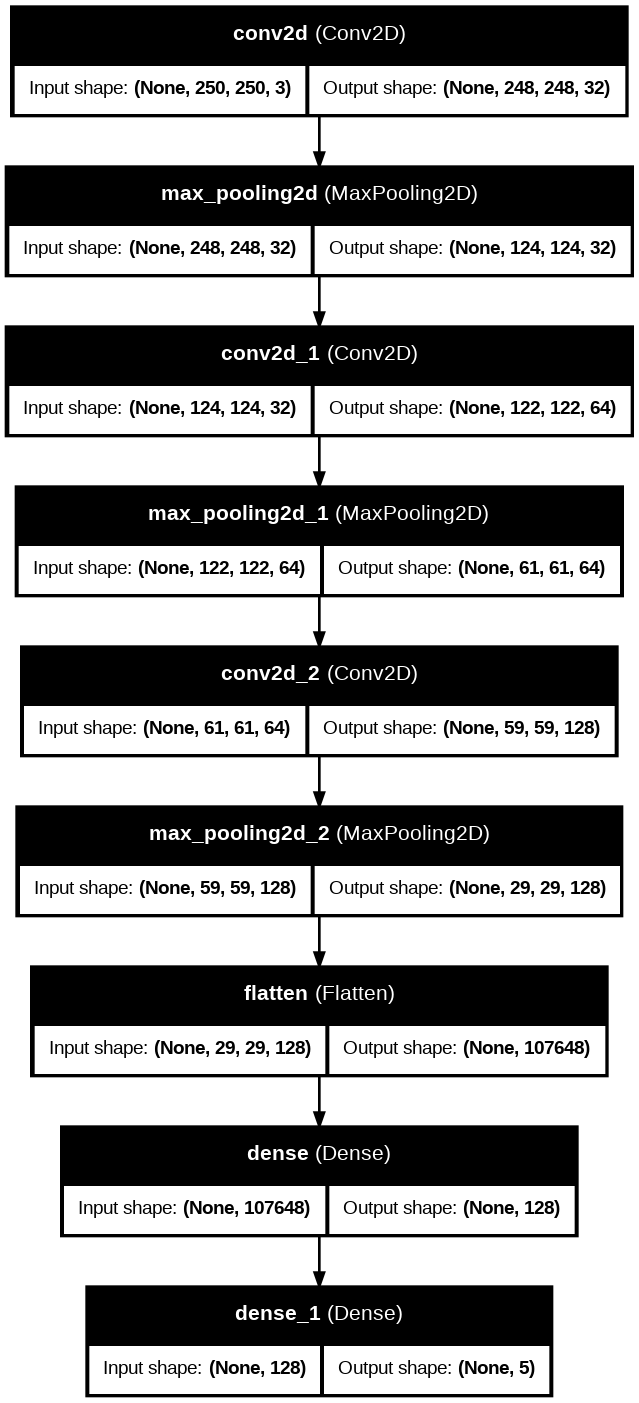

In [17]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

#### Traing the model

In [18]:
num_epochs = 10
#history=model.fit(x=Train, validation_data=Validation,epochs=num_epochs, callbacks=callbacks)

history=model.fit(x=Train,
                  validation_data=Validation,
                  epochs= num_epochs)

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 135s 92ms/step - accuracy: 0.9064 - loss: 3.0134 - val_accuracy: 0.9752 - val_loss: 0.0740


#### Create function to Calculate Training and Validation Accuracy of the model

In [19]:
def plot_accuracy(history, num_epochs):

    # Define fixed colors
    train_color = '#BF247A'
    val_color = '#2A2359'

    # Set up the plot
    plt.figure(figsize=(15, 8))
    sns.set_style("whitegrid")

    # Plot accuracy
    plt.plot(history.history['accuracy'], color=train_color, marker='o', label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], color=val_color, marker='h', label='Validation Accuracy')

    # Add titles, labels, and legend
    plt.title('Accuracy Comparison Between Train and Validation Dataset', fontsize=15)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Customize x-axis ticks
    plt.xticks(range(1, num_epochs + 1, 1))

    # Add legend
    plt.legend(loc='best')
    plt.show()

#### Create function to Calculate Training and Validation Loss of the model

In [20]:
import seaborn as sns
colors = ["#3498DB","#BDC3C7"]
def plot_train_val_loss(history, num_epochs):

    # Set up the plot
    plt.figure(figsize=(15, 8))
    sns.set_style("whitegrid")


    # Plot training and validation loss
    plt.plot(history.history['loss'], color=colors[0], marker='o', label='Train Loss')
    plt.plot(history.history['val_loss'], color=colors[1], marker='h', label='Validation Loss')


    # Add titles, labels, and legend
    plt.title('Loss Comparison Between Training and Validation Dataset', fontsize=15)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

    # Customize x-axis ticks
    plt.xticks(range(1, num_epochs + 1, 1))

    # Add legend
    plt.legend(loc='best')
    plt.show()

#### Create Function to calculate Confution Matrix of Model

In [21]:
def plot_confusion_matrix(cm, class_names, title='Confusion Matrix'):

    # Generate a custom color map using a blue-cyan gradient
    cmap = sns.light_palette("#2E3192", as_cmap=True)


    # Plotting the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    cax = ax.matshow(cm, cmap=cmap)
    fig.colorbar(cax)


    # Set tick labels
    ax.xaxis.set(ticks=range(len(class_names)), ticklabels=[f'Predicted {label}' for label in class_names])
    ax.yaxis.set(ticks=range(len(class_names)), ticklabels=[f'Actual {label}' for label in class_names])
    ax.set_ylim(len(class_names) - 0.5, -0.5)


    # Annotate the matrix with counts
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            color = "white" if cm[i, j] > cm.max() / 2 else "black"  # Adaptive text color
            ax.text(j, i, cm[i, j], ha='center', va='center', color=color, fontweight='bold', fontsize=12)

    # Add title and labels
    ax.set_xlabel('Predicted', fontsize=12, color='#1BFFFF', fontweight='bold')
    ax.set_ylabel('Actual', fontsize=12, color='#1BFFFF', fontweight='bold')
    ax.set_title(title, fontsize=15, fontweight='bold',
                 color='white', backgroundcolor='#2E3192',
                 pad=20, loc='center')

    # Rotate x-ticks for better readability
    plt.xticks(rotation=45)

    plt.show()

#### Comparing of Training and Validation Accuracy of the model

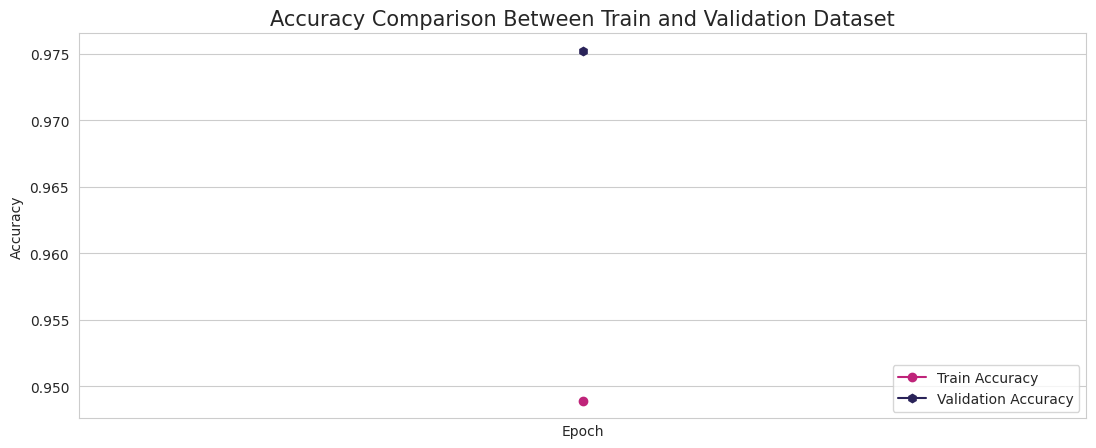

In [22]:
num_epochs = 10
colors3=["#BF247A",'#812B8C','#2A2359','#50E3C2',"#E94E77",'#7B72E9','#F5A623']
import seaborn as sns

# Plotting the accuracy
plt.figure(figsize=(13,5))
sns.set_style("whitegrid")

# Access the history dictionary through model.history.history
plt.plot(history.history['accuracy'], color=colors3[0],
         marker='o', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color=colors3[2],
         marker='h', label='Validation Accuracy')

# Add titles and labels
plt.title('Accuracy Comparison Between Train and Validation Dataset', fontsize=15)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.xticks(range(1, num_epochs,
                 1))
plt.show()

#### Comparing of Training and Validation Accuracy of the model

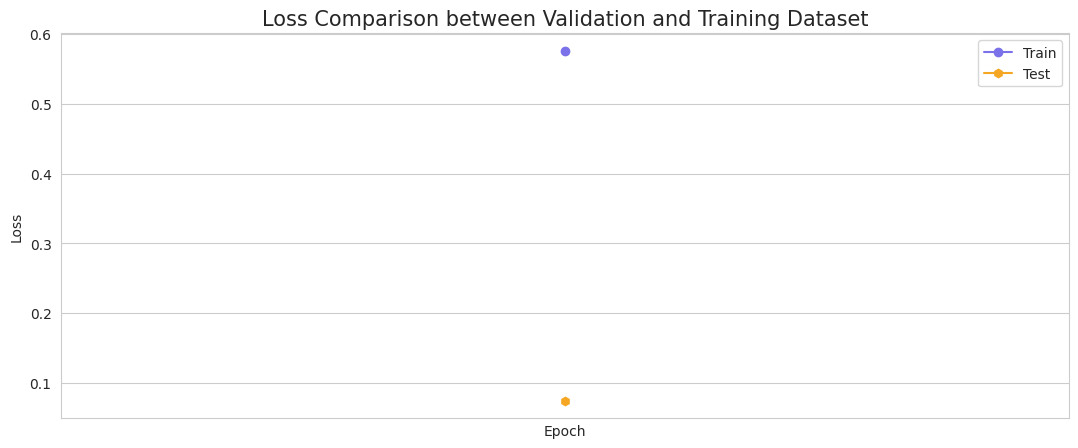

In [23]:
plt.figure(figsize=(13,5))

#plotting the loss
sns.set_style("whitegrid")
plt.plot(history.history['loss'], color=colors3[5],
         marker='o')
plt.plot(history.history['val_loss'], color=colors3[6],
         marker='h')
plt.title('Loss Comparison between Validation and Training Dataset', fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Set x-axis ticks to show every epoch from 1 to 30
plt.xticks(range(1, #num_epochs,
                 1))

plt.legend(['Train', 'Test'], loc='best')
plt.show()

#### Generating Prediction and True Labels for CNN
- Model Evaluation

In [24]:
import numpy as np
predictions = []
true_labels = []

class_names = ["Arborio","Basmati","Ipsala","Jasmine","Karacadag"]

for batch in Test:
    images, labels = batch
    batch_predictions = model.predict(images, verbose=0)
    predictions.extend(np.argmax(batch_predictions, axis=1))
    true_labels.extend(np.argmax(labels, axis=1))

predictions = np.array(predictions)
true_labels = np.array(true_labels)

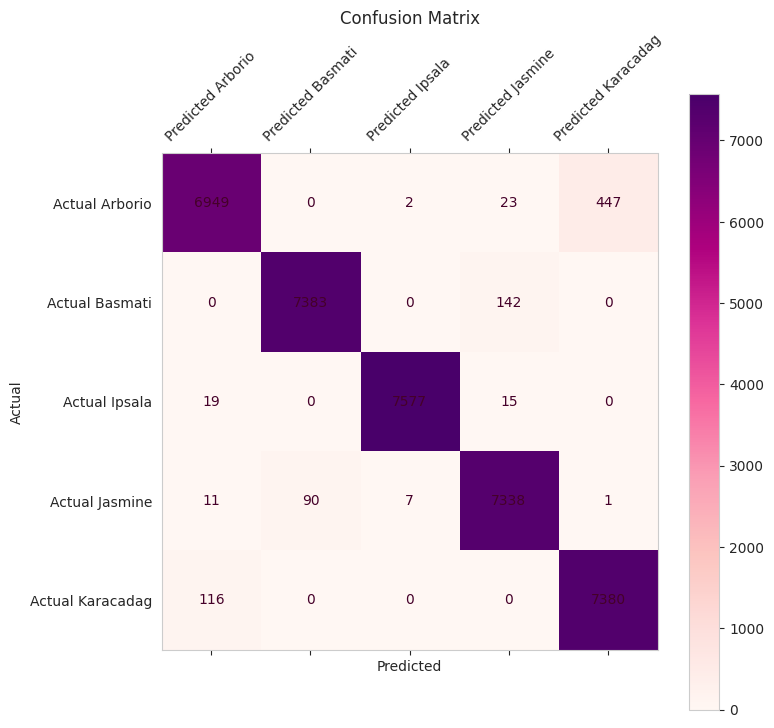

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

#class_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions, labels=range(len(class_names)))

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(cm, cmap=plt.cm.RdPu)
fig.colorbar(cax)

ax.grid(False)

# Set tick labels
ax.xaxis.set(ticks=range(len(class_names)), ticklabels=[f'Predicted {label}' for label in class_names])
ax.yaxis.set(ticks=range(len(class_names)), ticklabels=[f'Actual {label}' for label in class_names])
ax.set_ylim(len(class_names) - 0.5, -0.5)

# Annotate the matrix with counts
for i in range(len(class_names)):
    for j in range(len(class_names)):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='#450029')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.show()

#### Confusion Matrix for Model

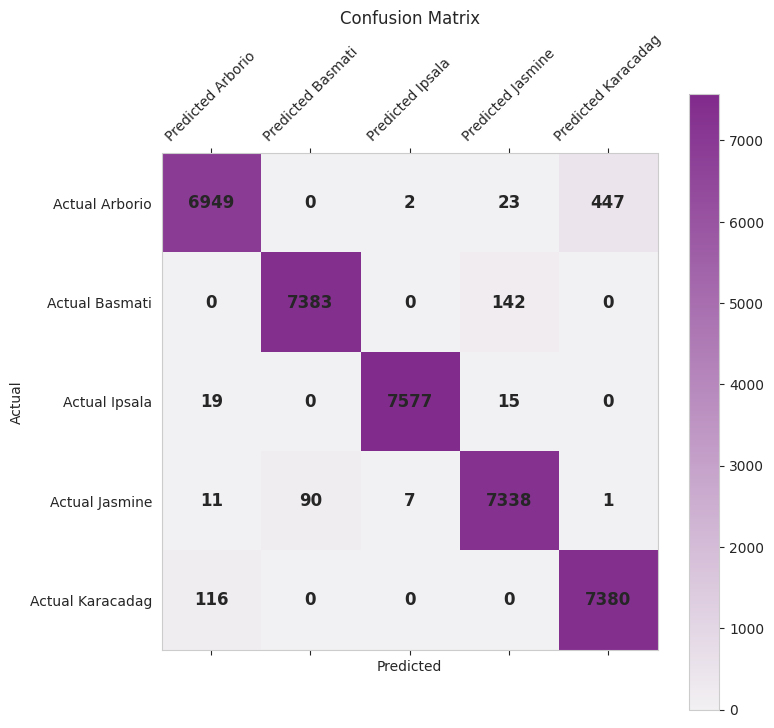

In [26]:
# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions, labels=range(len(class_names)))

# Generate a custom color map using Seaborn
cmap = sns.light_palette("#812B8C", as_cmap=True)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(cm, cmap=cmap)
fig.colorbar(cax)

ax.grid()

# Set tick labels
ax.xaxis.set(ticks=range(len(class_names)), ticklabels=[f'Predicted {label}' for label in class_names])
ax.yaxis.set(ticks=range(len(class_names)), ticklabels=[f'Actual {label}' for label in class_names])
ax.set_ylim(len(class_names) - 0.5, -0.5)

# Annotate the matrix with counts, using white bold text for readability
for i in range(len(class_names)):
    for j in range(len(class_names)):
        ax.text(j, i, cm[i, j], ha='center', va='center', fontweight='bold', fontsize=12)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.show()

#### Classification Report for the Model

In [27]:
# Ensure `predictions` also has the same length as `true_labels`.
from sklearn.metrics import classification_report
import pandas as pd
report1 = classification_report(true_labels, predictions, target_names=class_names, output_dict=True)

# Convert the classification report dictionary to a DataFrame and transpose
df1 = pd.DataFrame(report1).transpose()
print(df1)

              precision    recall  f1-score      support
Arborio        0.979422  0.936397  0.957426   7421.00000
Basmati        0.987957  0.981130  0.984531   7525.00000
Ipsala         0.998814  0.995533  0.997170   7611.00000
Jasmine        0.976057  0.985363  0.980688   7447.00000
Karacadag      0.942770  0.984525  0.963195   7496.00000
accuracy       0.976720  0.976720  0.976720      0.97672
macro avg      0.977004  0.976589  0.976602  37500.00000
weighted avg   0.977076  0.976720  0.976704  37500.00000


#### Evaluation Basic CNN Model

In [28]:
# Evaluate the model on the Test data
print("Evaluation on Test data:")
loss, accuracy = model.evaluate(Test)  # Evaluate directly on the Test dataset
print(f"\nModel loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy * 100):.2f}%")

Evaluation on Test data:
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 30s 26ms/step - accuracy: 0.9753 - loss: 0.0727

Model loss on test set: 0.07098884880542755
Model accuracy on test set: 97.67%


#### Visualization CNN Predictions With actual labels for test image datasets

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


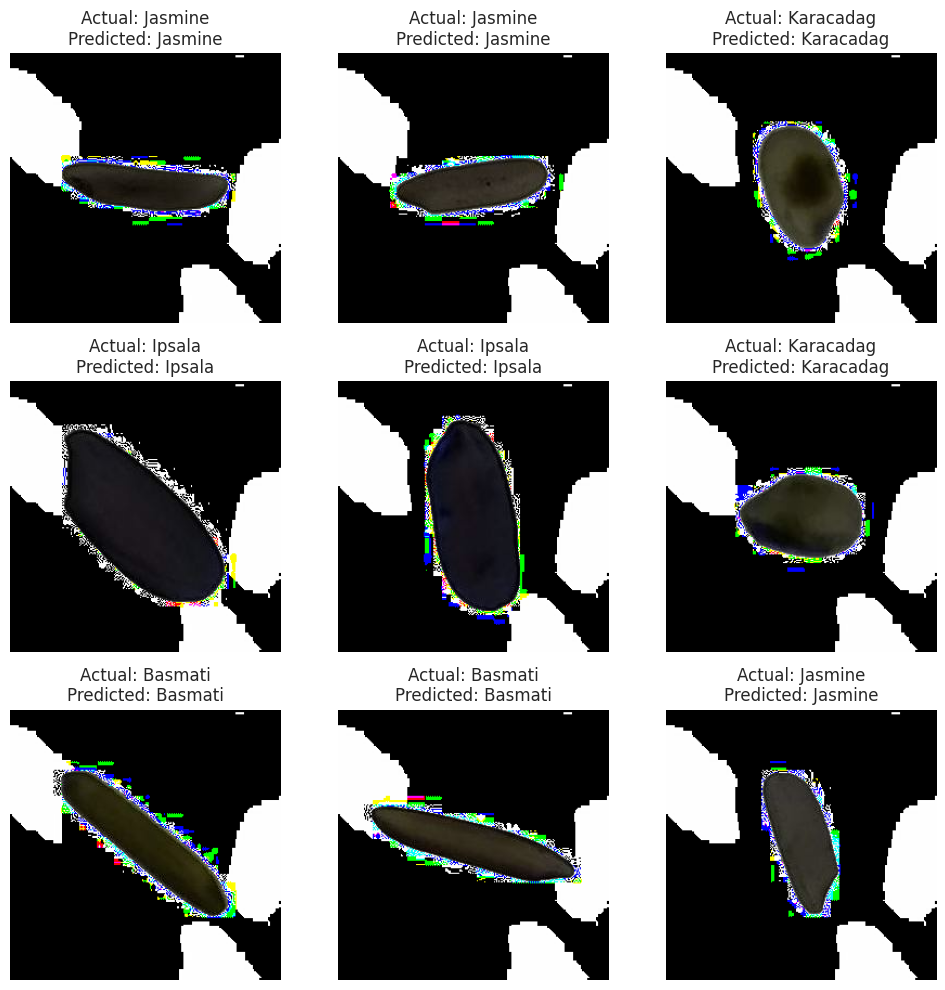

In [29]:
# Display images with predictions
plt.figure(figsize=(10, 10))
for images, labels in Test.take(1):  # Take one batch of images
    images = images * 255  # Scale up if images are normalized
    for i in range(9):  # Display 9 images
        ax = plt.subplot(3, 3, i + 1)
        img = images[i].numpy().astype("uint8")  # Convert to uint8 for display
        plt.imshow(img)

        # Predict and get labels
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        predicted_label = class_names[np.argmax(score)]
        actual_label = class_names[np.argmax(labels[i])]

        plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
        plt.axis("off")  # Hide axes

plt.tight_layout()
plt.show()

#### Save the Model

In [30]:
# # Save the model
# model.save('Improved_Model.h5')
# print ("Model saved successfully!")

## Second method

### Define batch normalization   CNN Model


In [31]:
from tensorflow.keras import layers, models
def create_cnn_with_batchnorm(input_shape, num_classes):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # Block 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
     # Block 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [32]:
import tensorflow as tf
# Setup parameters
input_shape = (250, 250, 3)
num_classes = 5

# Set up the Mirrored Strategy
strategy = tf.distribute.MirroredStrategy()

# Create and compile the model within the strategy's scope
with strategy.scope():
    # Use the improved CNN model function
    batch_model = create_cnn_with_batchnorm(input_shape, num_classes)

    batch_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Display the model summary
batch_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 248, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 248, 248, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 246, 246, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 246, 246, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 123, 123, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 121, 121, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 121, 121, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 119, 119, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 119, 119, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 59, 59, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 57, 57, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 57, 57, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 55, 55, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 55, 55, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 27, 27, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      23,888,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,178,213 (92.23 MB)

 Trainable params: 24,177,317 (92.23 MB)

 Non-trainable params: 896 (3.50 KB)

### Traning the model

In [33]:
num_epochs =10
#lr_logger = LearningRateLogger()

batch_history=batch_model.fit(x=Train,
                              validation_data=Validation,
                              epochs=num_epochs)

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 523s 366ms/step - accuracy: 0.8771 - loss: 1.7988 - val_accuracy: 0.8560 - val_loss: 0.6506


#### Comparing of Training and Validation Accuracy of the model

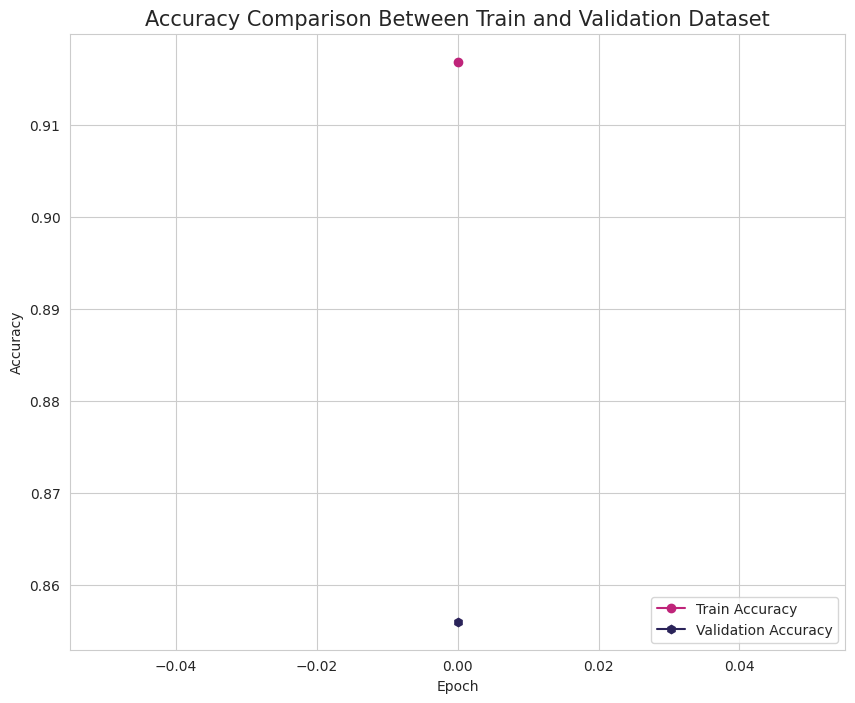

In [34]:
import seaborn as sns
#"#BF247A",'#812B8C','#2A2359'
# Plotting the accuracy
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Access the history dictionary through model.history.history
plt.plot(batch_history.history['accuracy'], color='#BF247A', marker='o', label='Train Accuracy')
plt.plot(batch_history.history['val_accuracy'], color='#2A2359', marker='h', label='Validation Accuracy')

# Add titles and labels
plt.title('Accuracy Comparison Between Train and Validation Dataset', fontsize=15)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

#### Comparing of Training and Validation loss of the model

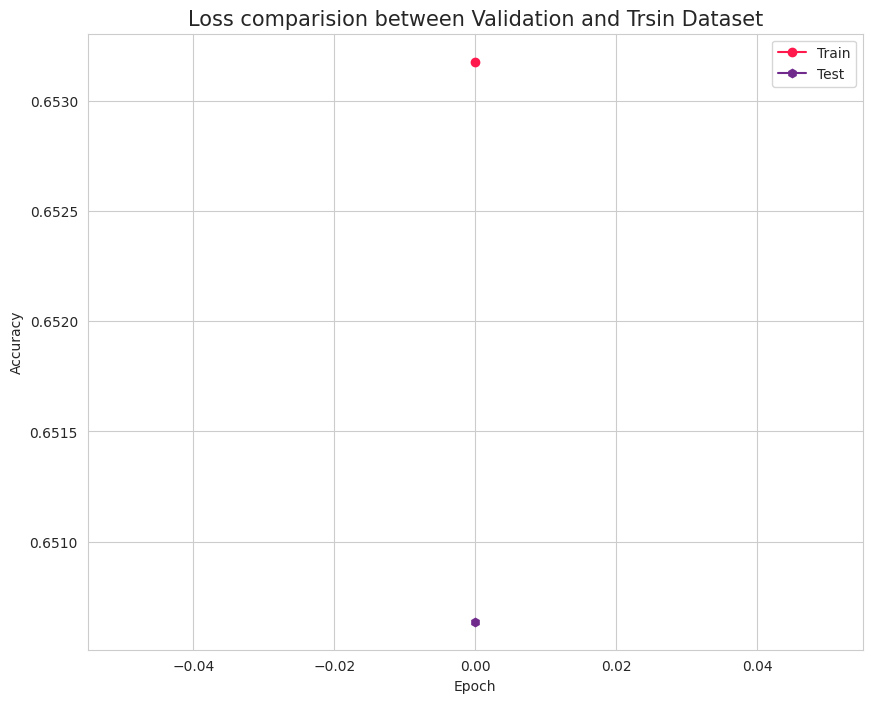

In [35]:
#"#FF194D",'#BF2669','#702A8C'
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
plt.plot(batch_history.history['loss'],color='#FF194D',marker='o')
plt.plot(batch_history.history['val_loss'],color='#702A8C',marker='h')
plt.title('Loss comparision between Validation and Trsin Dataset', fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='best')
plt.show()

#### Generating Prediction and True Labels for batch Nomarlization for CNN Model Evaluation

In [36]:
batch_predictions = []  # Initialize as a list
batch_true_labels = []
class_names = [
    "Arborio",
    "Basmati",
    "Ipsala",
    "Jasmine",
    "Karacadag"
]

for batch in Test:
    images, labels = batch
    batch_batch_predictions = batch_model.predict(images, verbose=0)
    batch_predictions.extend(np.argmax(batch_batch_predictions, axis=1).tolist()) # Use extend for lists
    batch_true_labels.extend(np.argmax(labels, axis=1).tolist())

# Convert to NumPy arrays after the loop
batch_predictions = np.array(batch_predictions)
batch_true_labels = np.array(batch_true_labels)

#### Confusion Matrix of the Model

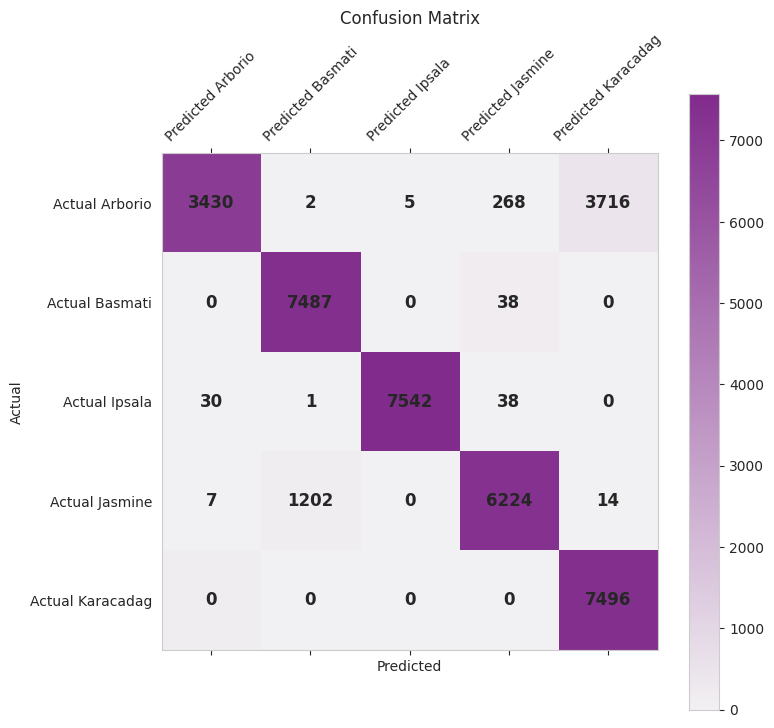

In [37]:
# Compute the confusion matrix
cm2 = confusion_matrix(batch_true_labels, batch_predictions, labels=range(len(class_names)))

# Generate a custom color map using Seaborn
cmap = sns.light_palette("#812B8C", as_cmap=True)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(cm, cmap=cmap)
fig.colorbar(cax)

ax.grid()

# Set tick labels
ax.xaxis.set(ticks=range(len(class_names)), ticklabels=[f'Predicted {label}' for label in class_names])
ax.yaxis.set(ticks=range(len(class_names)), ticklabels=[f'Actual {label}' for label in class_names])
ax.set_ylim(len(class_names) - 0.5, -0.5)

# Annotate the matrix with counts, using white bold text for readability
for i in range(len(class_names)):
    for j in range(len(class_names)):
        ax.text(j, i, cm2[i, j], ha='center', va='center', fontweight='bold', fontsize=12)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.show()

#### Classification Report of the Model

In [38]:
# Ensure `predictions` also has the same length as `true_labels`.
report3 = classification_report(batch_true_labels, batch_predictions, target_names=class_names, output_dict=True)

# Convert the classification report dictionary to a DataFrame and transpose
df3 = pd.DataFrame(report3).transpose()
print(df3)

              precision    recall  f1-score       support
Arborio        0.989328  0.462202  0.630051   7421.000000
Basmati        0.861367  0.994950  0.923352   7525.000000
Ipsala         0.999337  0.990934  0.995118   7611.000000
Jasmine        0.947625  0.835773  0.888191   7447.000000
Karacadag      0.667736  1.000000  0.800769   7496.000000
accuracy       0.858107  0.858107  0.858107      0.858107
macro avg      0.893079  0.856772  0.847496  37500.000000
weighted avg   0.893116  0.858107  0.848389  37500.000000


#### Evaluation Batch Normalization Model

In [39]:
# Evaluate the model on the Test data
print("Evaluation on Test data:")
batch_loss, batch_accuracy = batch_model.evaluate(Test)  # Evaluate directly on the Test dataset
print(f"\nModel loss on test set: {batch_loss}")
print(f"Model accuracy on test set: {(batch_accuracy * 100):.2f}%")

Evaluation on Test data:
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 87s 74ms/step - accuracy: 0.8589 - loss: 0.6472

Model loss on test set: 0.6411814093589783
Model accuracy on test set: 85.81%


#### Visualization Batch Normalization CNN Prediction With Actual Labels for Test DataSets


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


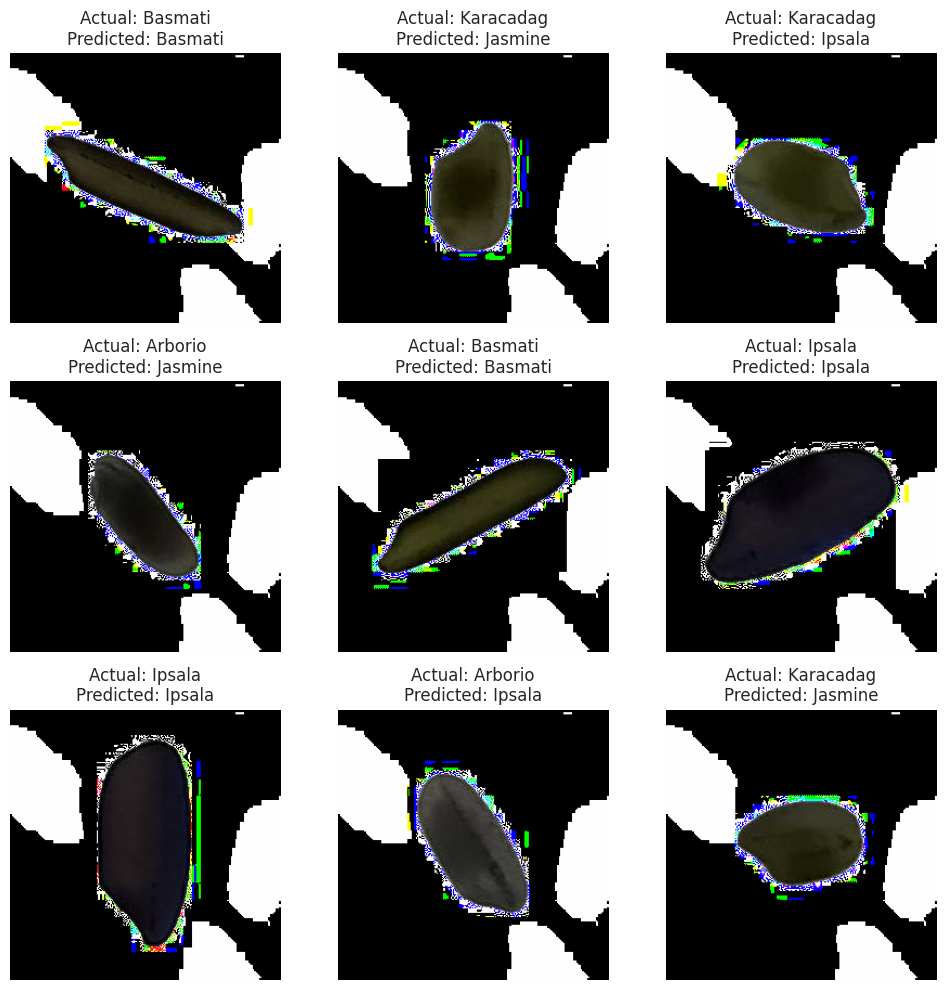

In [40]:
# Display images with predictions
plt.figure(figsize=(10, 10))
for images, labels in Test.take(1):  # Take one batch of images
    images = images * 255  # Scale up if images are normalized
    for i in range(9):  # Display 9 images
        ax = plt.subplot(3, 3, i + 1)
        img = images[i].numpy().astype("uint8")  # Convert to uint8 for display
        plt.imshow(img)

        # Predict and get labels
        batch_predictions = batch_model.predict(tf.expand_dims(images[i], 0))
        batch_score = tf.nn.softmax(batch_predictions[0])
        batch_predicted_label = class_names[np.argmax(batch_score)]
        batch_actual_label = class_names[np.argmax(labels[i])]
        plt.title(f"Actual: {batch_actual_label}\nPredicted: {batch_predicted_label}")
        plt.axis("off")  # Hide axes

plt.tight_layout()
plt.show()

#### Matrix Comparision CNN Model


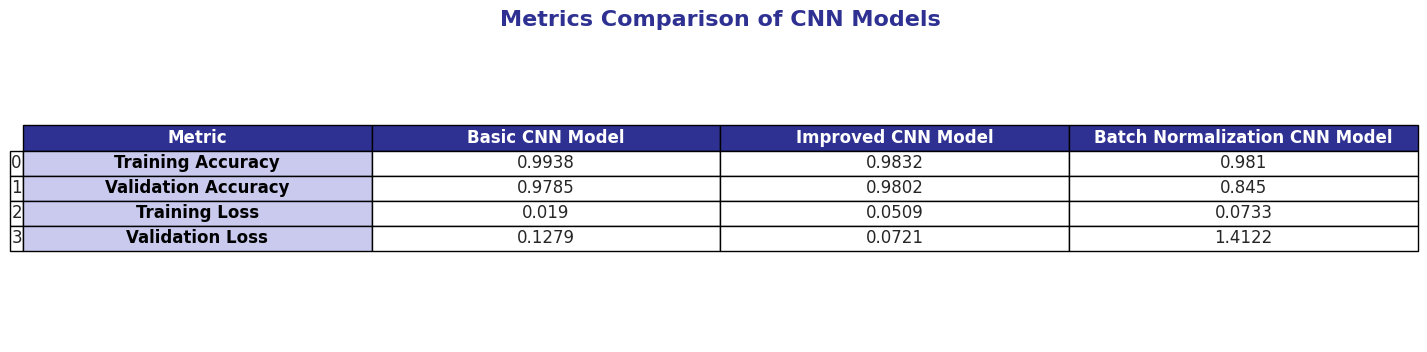

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

def compare_model_metrics_stylish():
    # Manually define the metrics
    metrics = {
        "Metric": ["Training Accuracy", "Validation Accuracy", "Training Loss", "Validation Loss"],
        "Basic CNN Model": [0.9938, 0.9785, 0.0190, 0.1279],
        "Improved CNN Model": [0.9832, 0.9802, 0.0509, 0.0721],
        "Batch Normalization CNN Model": [0.9810, 0.8450, 0.0733, 1.4122]
    }

    # Create a DataFrame
    df = pd.DataFrame(metrics)
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('off')  # Turn off the axis

    # Render the table with a custom style
    tbl = table(ax, df, loc='center', cellLoc='center', colWidths=[0.3] * len(df.columns))
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(12)
    tbl.scale(1.5, 1.5)

    # Add background color and borders
    for (row, col), cell in tbl.get_celld().items():
        if row == 0:  # Header row
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor('#2E3192')  #  header
        elif col == 0:  # Metric column
            cell.set_text_props(weight='bold', color='black')
            cell.set_facecolor('#c9caee')  # Light gray
        else:  # Data cells
            cell.set_facecolor('#ffffff')  # White

    # Add a title
    plt.title("Metrics Comparison of CNN Models", fontsize=16, weight='bold', color='#2E3192')

    # Show the styled table
    plt.show()

# Example usage
compare_model_metrics_stylish()

## Model Comparison

In this comparison, we have three models:

- Basic CNN Model
- Improved CNN Model
- Batch Normalization CNN Model
#### Model Metrics
###### Basic CNN Model
- Training Accuracy: 99.38% (Very high, indicating excellent learning on training data)
- Validation Accuracy: 97.85% (High, indicating good generalization)
- Training Loss: 0.019 (Very low, suggesting good learning)
- Validation Loss: 0.1279 (Reasonably low, indicating good generalization)
###### Improved CNN Model
- Training Accuracy: 98.32% (Slightly lower than the basic model but still high)
- Validation Accuracy: 98.02% (Very high, showing excellent performance on validation data)
- Training Loss: 0.0509 (Slightly higher than the basic model)
- Validation Loss: 0.0721 (Low, suggesting the model generalizes well without overfitting)
###### Batch Normalization CNN Model
- Training Accuracy: 98.10% (Similar to the improved model)
- Validation Accuracy: 84.50% (Significantly lower, indicating overfitting or poor generalization)
- Training Loss: 0.0733 (Moderately higher compared to other models)
- Validation Loss: 1.4122 (High, suggesting poor generalization and ing)

#### Key Insights
- Basic CNN Model has the highest training accuracy and good validation accuracy, with the lowest loss values, making it the most balanced model.
- Improved CNN Model shows strong validation accuracy but slightly higher training loss, which suggests a more robust generalization.
- Batch Normalization CNN Model has a much lower validation accuracy and higher validation loss, indicating that it struggles to generalize to unseen data, possibly due to overfitting.

### Conclusion
- The Basic CNN Model appears to be the most well-rounded model in terms of both training and validation performance.
- The Improved CNN Model also performs well, especially on validation data, but with slightly higher training loss.
- The Batch Normalization CNN Model struggles with generalization and might require further tuning.